## Question 4
### Cash Vs. Credit Distribution For Trips Under Dollar 150

In [19]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [20]:
extracted_files = glob.glob('..\\Data\\*\\*\\processed\\*.csv')
df = pd.DataFrame()
list_ = []
for fileName in extracted_files:
    short_df = pd.read_csv(fileName)
    list_.append(short_df)
df = pd.concat(list_)

In [21]:
df.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
0,0,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.979424,40.744614,1,N,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2016-01-01,Manhattan,Manhattan
1,1,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.947151,40.791046,1,N,...,18.0,0.5,0.5,0.00,0.0,0.3,19.30,2016-01-01,Manhattan,Manhattan
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.0,0.3,9.95,2016-01-01,Manhattan,Manhattan


In [22]:
df = df[df['payment_type'].isin([1,2])]

In [23]:
#Ignoring the outliars
df = df[df['tip_amount']<df['fare_amount']]
df = df[df['total_amount']<150]
df = df[df['pickup_area'] != 'Not Specified']
df = df[df['dropoff_area'] != 'Not Specified']
df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
0,0,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.979424,40.744614,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2016-01-01,Manhattan,Manhattan
1,1,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.947151,40.791046,1,N,...,18.0,0.5,0.5,0.00,0.00,0.3,19.30,2016-01-01,Manhattan,Manhattan
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.00,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.00,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.00,0.3,9.95,2016-01-01,Manhattan,Manhattan
5,5,1,2016-01-01 00:00:07,2016-01-01 00:20:35,2,4.9,-73.953033,40.672115,1,N,...,19.0,0.5,0.5,4.06,0.00,0.3,24.36,2016-01-01,Brooklyn,Manhattan
6,6,1,2016-01-01 00:00:07,2016-01-01 00:09:49,1,1.8,-73.989166,40.726589,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,2016-01-01,Manhattan,Manhattan
7,7,1,2016-01-01 00:00:09,2016-01-01 00:19:03,3,5.3,-73.997131,40.736961,1,N,...,18.0,0.5,0.5,3.85,0.00,0.3,23.15,2016-01-01,Manhattan,Queens
8,8,1,2016-01-01 00:00:09,2016-01-01 00:07:18,2,1.2,-73.963913,40.712173,1,N,...,7.0,0.5,0.5,0.00,0.00,0.3,8.30,2016-01-01,Brooklyn,Brooklyn
9,9,1,2016-01-01 00:00:14,2016-01-01 00:13:02,1,2.4,-73.995598,40.744240,1,N,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,2016-01-01,Manhattan,Manhattan


In [24]:
df.head()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,travel_date,pickup_area,dropoff_area
0,0,1,2016-01-01 00:00:01,2016-01-01 00:11:55,1,1.2,-73.979424,40.744614,1,N,...,9.0,0.5,0.5,0.00,0.0,0.3,10.30,2016-01-01,Manhattan,Manhattan
1,1,1,2016-01-01 00:00:02,2016-01-01 00:11:14,1,6.0,-73.947151,40.791046,1,N,...,18.0,0.5,0.5,0.00,0.0,0.3,19.30,2016-01-01,Manhattan,Manhattan
2,2,1,2016-01-01 00:00:04,2016-01-01 00:14:32,1,3.7,-74.004303,40.742241,1,N,...,14.0,0.5,0.5,3.05,0.0,0.3,18.35,2016-01-01,Manhattan,Manhattan
3,3,1,2016-01-01 00:00:05,2016-01-01 00:14:27,2,2.2,-73.991997,40.718578,1,N,...,11.0,0.5,0.5,1.50,0.0,0.3,13.80,2016-01-01,Manhattan,Manhattan
4,4,1,2016-01-01 00:00:06,2016-01-01 00:04:44,1,1.7,-73.982101,40.774696,1,Y,...,7.0,0.5,0.5,1.65,0.0,0.3,9.95,2016-01-01,Manhattan,Manhattan


In [25]:
df['payment_type'] = df.payment_type.apply(lambda x: 'Credit' if x == 1 else 'Cash')
df = df.rename(columns = {'dropoff_area':'Dropoff Area', 'payment_type':'Payment Type', 'total_amount':'Amount'})

In [26]:
grouped_series_df = df['Amount'].groupby([df['Dropoff Area'], df['Payment Type']]).mean()
grouped_df = grouped_series_df.to_frame()
grouped_df = grouped_df.reset_index()
grouped_df = grouped_df.round(2)
grouped_df

,Dropoff Area,Payment Type,Amount
0,Bronx,Cash,24.87
1,Bronx,Credit,36.72
2,Brooklyn,Cash,19.85
3,Brooklyn,Credit,25.62
4,Manhattan,Cash,11.19
5,Manhattan,Credit,14.54
6,Queens,Cash,23.25
7,Queens,Credit,32.44
8,Staten Island,Cash,67.40
9,Staten Island,Credit,84.37


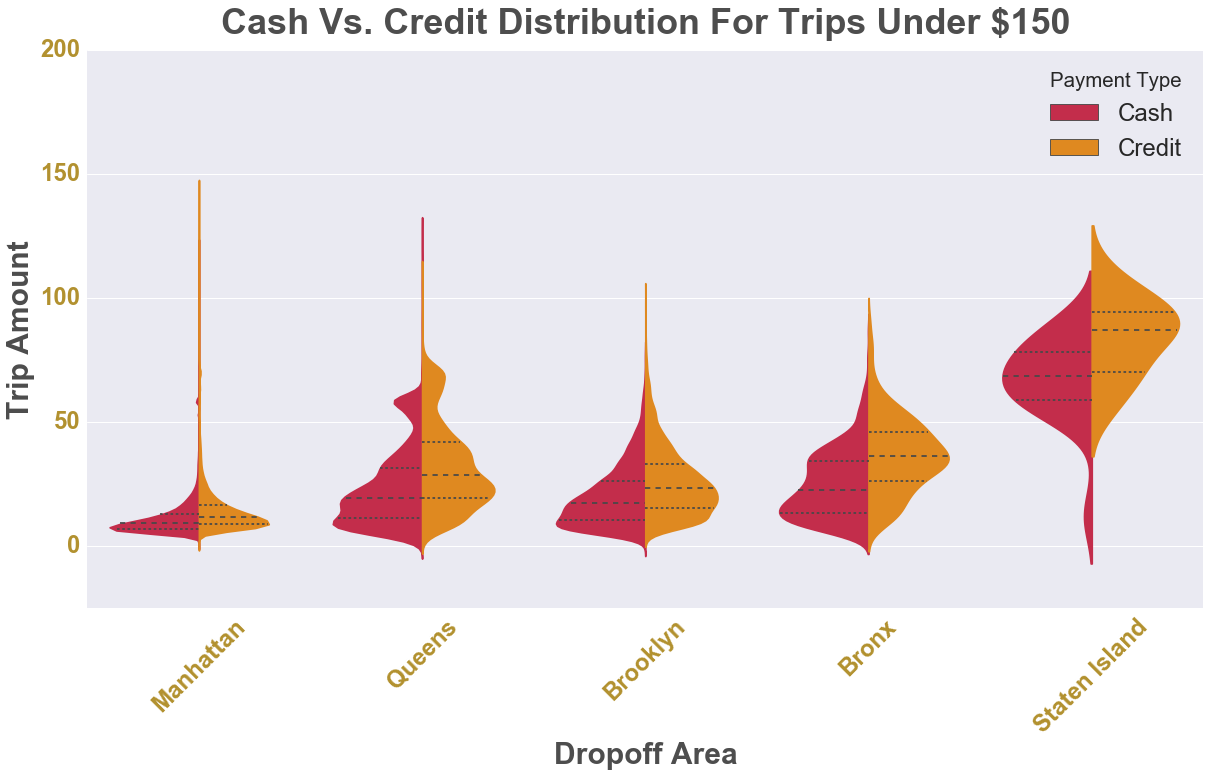

In [27]:
plt.subplots(figsize=(20,10))
rc={'font.size': 24, 'axes.labelsize': 24, 'legend.fontsize': 24.0, 
    'axes.titlesize': 32, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
sns.set(rc=rc, style='whitegrid')
violin_plot = sns.violinplot(x="Dropoff Area", y="Amount", hue="Payment Type", data=df, split=True,
                             inner="quart", palette={"Cash": "#DC143C", "Credit": "#FF8C00"})
violin_plot.set_ylim(-25, 200)

#title
violin_plot.set_title('Cash Vs. Credit Distribution For Trips Under $150')
violin_plot.title.set_fontsize(36)
violin_plot.title.set_position([.5, 1.02])
violin_plot.title.set_fontweight(weight='bold')
violin_plot.title.set_color('#4D4D4D')

#XyLabels
violin_plot.xaxis.get_label().set_fontsize(30)
violin_plot.xaxis.get_label().set_fontweight(weight='bold')
violin_plot.xaxis.get_label().set_color('#4D4D4D')

violin_plot.yaxis.get_label().set_fontsize(30)
violin_plot.yaxis.get_label().set_fontweight(weight='bold')
violin_plot.yaxis.get_label().set_color('#4D4D4D')

#Ticks
plt.setp(violin_plot.get_xticklabels(), rotation=45, fontsize=24, color='#B2912F', fontweight='bold')
plt.setp(violin_plot.get_yticklabels(), fontsize=24, color='#B2912F', fontweight='bold')

violin_plot.set(xlabel='Dropoff Area', ylabel='Trip Amount')

sns.despine(left=True)